# Data importing and clearing
*Values imported into 'data' dataframe, not assigned Borough values are droped.*

In [27]:
import pandas as pd
import numpy as np

In [28]:
data=pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
data = data[0]
data = data[data.Borough != 'Not assigned']
data = data.reset_index(drop=True)
data


Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
..          ...               ...   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                         Neighbourhood  
0                                            Parkwoods  
1                                     Victoria Village  
2                            Regent Park, Harbourfront  
3                     Lawrence Manor, Lawrence Heights  
4          Queen's Park, Ontario Provincial Government  
..                                                 ...  
98       The Kingsway, Montgomery Road, Old Mill North  
99                                Church and Wellesley  
100  Business reply mail Processing Centre, South C...  
101  Old Mill South, King's Mill Park, Sunnylea, Hu...  
102  Mimico NW, The Queensway West, South of Bloor,...  

[103 rows x 3 columns]

*Duplicate Neighbourhoods are devided by commas.*

In [86]:
data = (data.set_index(['Postal Code','Borough'])
     .apply(lambda x: x.str.split(', ').explode())
     .reset_index())
data

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M5A  Downtown Toronto   
4           M6A        North York   
5           M6A        North York   
6           M7A  Downtown Toronto   
7           M7A  Downtown Toronto   
8           M9A         Etobicoke   
9           M9A         Etobicoke   
10          M1B       Scarborough   
11          M1B       Scarborough   
12          M3B        North York   
13          M4B         East York   
14          M4B         East York   
15          M5B  Downtown Toronto   
16          M5B  Downtown Toronto   
17          M6B        North York   
18          M9B         Etobicoke   
19          M9B         Etobicoke   
20          M9B         Etobicoke   
21          M9B         Etobicoke   
22          M9B         Etobicoke   
23          M1C       Scarborough   
24          M1C       Scarborough   
25          M1C       Scarborough   
26          M3C        North York   
27          M4C         East York   
28          M5C  Downtown Toronto   
29          M6C              York   
30          M9C         Etobicoke   
31          M9C         Etobicoke   
32          M9C         Etobicoke   
33          M9C         Etobicoke   
34          M1E       Scarborough   
35          M1E       Scarborough   
36          M1E       Scarborough   
37          M4E      East Toronto   
38          M5E  Downtown Toronto   
39          M6E              York   
40          M1G       Scarborough   
41          M4G         East York   
42          M5G  Downtown Toronto   
43          M6G  Downtown Toronto   
44          M1H       Scarborough   
45          M2H        North York   
46          M3H        North York   
47          M3H        North York   
48          M3H        North York   
49          M4H         East York   
50          M5H  Downtown Toronto   
51          M5H  Downtown Toronto   
52          M5H  Downtown Toronto   
53          M6H      West Toronto   
54          M6H      West Toronto   
55          M1J       Scarborough   
56          M2J        North York   
57          M2J        North York   
58          M2J        North York   
59          M3J        North York   
60          M3J        North York   
61          M4J         East York   
62          M4J         East York   
63          M5J  Downtown Toronto   
64          M5J  Downtown Toronto   
65          M5J  Downtown Toronto   
66          M6J      West Toronto   
67          M6J      West Toronto   
68          M1K       Scarborough   
69          M1K       Scarborough   
70          M1K       Scarborough   
71          M2K        North York   
72          M3K        North York   
73          M4K      East Toronto   
74          M4K      East Toronto   
75          M5K  Downtown Toronto   
76          M5K  Downtown Toronto   
77          M6K      West Toronto   
78          M6K      West Toronto   
79          M6K      West Toronto   
80          M1L       Scarborough   
81          M1L       Scarborough   
82          M1L       Scarborough   
83          M2L        North York   
84          M2L        North York   
85          M3L        North York   
86          M4L      East Toronto   
87          M4L      East Toronto   
88          M5L  Downtown Toronto   
89          M5L  Downtown Toronto   
90          M6L        North York   
91          M6L        North York   
92          M6L        North York   
93          M9L        North York   
94          M1M       Scarborough   
95          M1M       Scarborough   
96          M1M       Scarborough   
97          M2M        North York   
98          M2M        North York   
99          M3M        North York   
100         M4M      East Toronto   
101         M5M        North York   
102         M5M        North York   
103         M6M              York   
104         M6M              York   
105         M6M              York   
106         M9M        North York   
107     

In [87]:
test = data[data.Neighbourhood == 'Not assigned']
test

Empty DataFrame
Columns: [Postal Code, Borough, Neighbourhood]
Index: []

In [88]:
data.shape

(217, 3)

# Adding coordinates

In [75]:
coordinates = pd.read_csv('http://cocl.us/Geospatial_data')
coordinates

Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
5           M1J  43.744734 -79.239476
6           M1K  43.727929 -79.262029
7           M1L  43.711112 -79.284577
8           M1M  43.716316 -79.239476
9           M1N  43.692657 -79.264848
10          M1P  43.757410 -79.273304
11          M1R  43.750072 -79.295849
12          M1S  43.794200 -79.262029
13          M1T  43.781638 -79.304302
14          M1V  43.815252 -79.284577
15          M1W  43.799525 -79.318389
16          M1X  43.836125 -79.205636
17          M2H  43.803762 -79.363452
18          M2J  43.778517 -79.346556
19          M2K  43.786947 -79.385975
20          M2L  43.757490 -79.374714
21          M2M  43.789053 -79.408493
22          M2N  43.770120 -79.408493
23          M2P  43.752758 -79.400049
24          M2R  43.782736 -79.442259
25          M3A  43.753259 -79.329656
26          M3B  43.745906 -79.352188
27          M3C  43.725900 -79.340923
28          M3H  43.754328 -79.442259
29          M3J  43.767980 -79.487262
30          M3K  43.737473 -79.464763
31          M3L  43.739015 -79.506944
32          M3M  43.728496 -79.495697
33          M3N  43.761631 -79.520999
34          M4A  43.725882 -79.315572
35          M4B  43.706397 -79.309937
36          M4C  43.695344 -79.318389
37          M4E  43.676357 -79.293031
38          M4G  43.709060 -79.363452
39          M4H  43.705369 -79.349372
40          M4J  43.685347 -79.338106
41          M4K  43.679557 -79.352188
42          M4L  43.668999 -79.315572
43          M4M  43.659526 -79.340923
44          M4N  43.728020 -79.388790
45          M4P  43.712751 -79.390197
46          M4R  43.715383 -79.405678
47          M4S  43.704324 -79.388790
48          M4T  43.689574 -79.383160
49          M4V  43.686412 -79.400049
50          M4W  43.679563 -79.377529
51          M4X  43.667967 -79.367675
52          M4Y  43.665860 -79.383160
53          M5A  43.654260 -79.360636
54          M5B  43.657162 -79.378937
55          M5C  43.651494 -79.375418
56          M5E  43.644771 -79.373306
57          M5G  43.657952 -79.387383
58          M5H  43.650571 -79.384568
59          M5J  43.640816 -79.381752
60          M5K  43.647177 -79.381576
61          M5L  43.648198 -79.379817
62          M5M  43.733283 -79.419750
63          M5N  43.711695 -79.416936
64          M5P  43.696948 -79.411307
65          M5R  43.672710 -79.405678
66          M5S  43.662696 -79.400049
67          M5T  43.653206 -79.400049
68          M5V  43.628947 -79.394420
69          M5W  43.646435 -79.374846
70          M5X  43.648429 -79.382280
71          M6A  43.718518 -79.464763
72          M6B  43.709577 -79.445073
73          M6C  43.693781 -79.428191
74          M6E  43.689026 -79.453512
75          M6G  43.669542 -79.422564
76          M6H  43.669005 -79.442259
77          M6J  43.647927 -79.419750
78          M6K  43.636847 -79.428191
79          M6L  43.713756 -79.490074
80          M6M  43.691116 -79.476013
81          M6N  43.673185 -79.487262
82          M6P  43.661608 -79.464763
83          M6R  43.648960 -79.456325
84          M6S  43.651571 -79.484450
85          M7A  43.662301 -79.389494
86          M7R  43.636966 -79.615819
87          M7Y  43.662744 -79.321558
88          M8V  43.605647 -79.501321
89          M8W  43.602414 -79.543484
90          M8X  43.653654 -79.506944
91          M8Y  43.636258 -79.498509
92          M8Z  43.628841 -79.520999
93          M9A  43.667856 -79.532242
94          M9B  43.650943 -79.554724
95          M9C  43.643515 -79.577201
96          M9L  43.756303 -79.565963
97          M9M  43.724766 -79.532242
98          M9N  43.706876 -79.518188
99          M9P  43.696319 -79.532242
100         M9R  43.688905 -79.554724
101         M9V  43.739416 -79.588437
102         M9W  43.706748 -79.594054

In [89]:
data_merged = data.join(coordinates.set_index('Postal Code'), on='Postal Code')
data_merged

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M5A  Downtown Toronto   
4           M6A        North York   
5           M6A        North York   
6           M7A  Downtown Toronto   
7           M7A  Downtown Toronto   
8           M9A         Etobicoke   
9           M9A         Etobicoke   
10          M1B       Scarborough   
11          M1B       Scarborough   
12          M3B        North York   
13          M4B         East York   
14          M4B         East York   
15          M5B  Downtown Toronto   
16          M5B  Downtown Toronto   
17          M6B        North York   
18          M9B         Etobicoke   
19          M9B         Etobicoke   
20          M9B         Etobicoke   
21          M9B         Etobicoke   
22          M9B         Etobicoke   
23          M1C       Scarborough   
24          M1C       Scarborough   
25          M1C       Scarborough   
26          M3C        North York   
27          M4C         East York   
28          M5C  Downtown Toronto   
29          M6C              York   
30          M9C         Etobicoke   
31          M9C         Etobicoke   
32          M9C         Etobicoke   
33          M9C         Etobicoke   
34          M1E       Scarborough   
35          M1E       Scarborough   
36          M1E       Scarborough   
37          M4E      East Toronto   
38          M5E  Downtown Toronto   
39          M6E              York   
40          M1G       Scarborough   
41          M4G         East York   
42          M5G  Downtown Toronto   
43          M6G  Downtown Toronto   
44          M1H       Scarborough   
45          M2H        North York   
46          M3H        North York   
47          M3H        North York   
48          M3H        North York   
49          M4H         East York   
50          M5H  Downtown Toronto   
51          M5H  Downtown Toronto   
52          M5H  Downtown Toronto   
53          M6H      West Toronto   
54          M6H      West Toronto   
55          M1J       Scarborough   
56          M2J        North York   
57          M2J        North York   
58          M2J        North York   
59          M3J        North York   
60          M3J        North York   
61          M4J         East York   
62          M4J         East York   
63          M5J  Downtown Toronto   
64          M5J  Downtown Toronto   
65          M5J  Downtown Toronto   
66          M6J      West Toronto   
67          M6J      West Toronto   
68          M1K       Scarborough   
69          M1K       Scarborough   
70          M1K       Scarborough   
71          M2K        North York   
72          M3K        North York   
73          M4K      East Toronto   
74          M4K      East Toronto   
75          M5K  Downtown Toronto   
76          M5K  Downtown Toronto   
77          M6K      West Toronto   
78          M6K      West Toronto   
79          M6K      West Toronto   
80          M1L       Scarborough   
81          M1L       Scarborough   
82          M1L       Scarborough   
83          M2L        North York   
84          M2L        North York   
85          M3L        North York   
86          M4L      East Toronto   
87          M4L      East Toronto   
88          M5L  Downtown Toronto   
89          M5L  Downtown Toronto   
90          M6L        North York   
91          M6L        North York   
92          M6L        North York   
93          M9L        North York   
94          M1M       Scarborough   
95          M1M       Scarborough   
96          M1M       Scarborough   
97          M2M        North York   
98          M2M        North York   
99          M3M        North York   
100         M4M      East Toronto   
101         M5M        North York   
102         M5M        North York   
103         M6M              York   
104         M6M              York   
105         M6M              York   
106         M9M        North York   
107     

# Explore and cluster the neighborhoods in Toronto

*Filtering Toronto from all data.*

In [90]:
data_toronto= data_merged[data_merged['Borough'].str.contains('Toronto')]
toronto=data_toronto.reset_index(drop=True)
toronto

Postal Code           Borough  \
0          M5A  Downtown Toronto   
1          M5A  Downtown Toronto   
2          M7A  Downtown Toronto   
3          M7A  Downtown Toronto   
4          M5B  Downtown Toronto   
5          M5B  Downtown Toronto   
6          M5C  Downtown Toronto   
7          M4E      East Toronto   
8          M5E  Downtown Toronto   
9          M5G  Downtown Toronto   
10         M6G  Downtown Toronto   
11         M5H  Downtown Toronto   
12         M5H  Downtown Toronto   
13         M5H  Downtown Toronto   
14         M6H      West Toronto   
15         M6H      West Toronto   
16         M5J  Downtown Toronto   
17         M5J  Downtown Toronto   
18         M5J  Downtown Toronto   
19         M6J      West Toronto   
20         M6J      West Toronto   
21         M4K      East Toronto   
22         M4K      East Toronto   
23         M5K  Downtown Toronto   
24         M5K  Downtown Toronto   
25         M6K      West Toronto   
26         M6K      West Toronto   
27         M6K      West Toronto   
28         M4L      East Toronto   
29         M4L      East Toronto   
30         M5L  Downtown Toronto   
31         M5L  Downtown Toronto   
32         M4M      East Toronto   
33         M4N   Central Toronto   
34         M5N   Central Toronto   
35         M4P   Central Toronto   
36         M5P   Central Toronto   
37         M5P   Central Toronto   
38         M6P      West Toronto   
39         M6P      West Toronto   
40         M4R   Central Toronto   
41         M4R   Central Toronto   
42         M5R   Central Toronto   
43         M5R   Central Toronto   
44         M5R   Central Toronto   
45         M6R      West Toronto   
46         M6R      West Toronto   
47         M4S   Central Toronto   
48         M5S  Downtown Toronto   
49         M5S  Downtown Toronto   
50         M6S      West Toronto   
51         M6S      West Toronto   
52         M4T   Central Toronto   
53         M4T   Central Toronto   
54         M5T  Downtown Toronto   
55         M5T  Downtown Toronto   
56         M5T  Downtown Toronto   
57         M4V   Central Toronto   
58         M4V   Central Toronto   
59         M4V   Central Toronto   
60         M4V   Central Toronto   
61         M4V   Central Toronto   
62         M5V  Downtown Toronto   
63         M5V  Downtown Toronto   
64         M5V  Downtown Toronto   
65         M5V  Downtown Toronto   
66         M5V  Downtown Toronto   
67         M5V  Downtown Toronto   
68         M5V  Downtown Toronto   
69         M4W  Downtown Toronto   
70         M5W  Downtown Toronto   
71         M4X  Downtown Toronto   
72         M4X  Downtown Toronto   
73         M5X  Downtown Toronto   
74         M5X  Downtown Toronto   
75         M4Y  Downtown Toronto   
76         M7Y      East Toronto   
77         M7Y      East Toronto   

                                     Neighbourhood   Latitude  Longitude  
0                                      Regent Park  43.654260 -79.360636  
1                                     Harbourfront  43.654260 -79.360636  
2                                     Queen's Park  43.662301 -79.389494  
3                    Ontario Provincial Government  43.662301 -79.389494  
4                                  Garden District  43.657162 -79.378937  
5                                          Ryerson  43.657162 -79.378937  
6                                   St. James Town  43.651494 -79.375418  
7                                      The Beaches  43.676357 -79.293031  
8                                      Berczy Park  43.644771 -79.373306  
9                               Central Bay Street  43.657952 -79.387383  
10                                        Christie  43.669542 -79.422564  
11                                        Richmond  43.650571 -79.384568  
12                                        Adelaide  43.650571 -79.384568  
13                                            King  43.650571 -79.384568  
14                               

## *Install required packages*

In [44]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import requests
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0, anaconda/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::openssl-1.1.1g-he774522_0
  - defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::ca-certificates-2020.6.24-0
  - anaconda

## *Foursquare data collection*

In [45]:
CLIENT_ID = '52UC2EAHLTM113SKA3V2VILFH0PS2LDYPQX1AWC03KGMZCO4'
CLIENT_SECRET = 'IBZPKWO5OJMTRVMFG3ISZWMRMITVLW33P3FGMDSI31X5ORIR'
VERSION = '20180605'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 52UC2EAHLTM113SKA3V2VILFH0PS2LDYPQX1AWC03KGMZCO4
CLIENT_SECRET:IBZPKWO5OJMTRVMFG3ISZWMRMITVLW33P3FGMDSI31X5ORIR


*Define a function which gets data for a Neighbourhood*

In [91]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

*Apply a function for all Neighbourhoods*

In [92]:
toronto_venues = getNearbyVenues(names=toronto['Neighbourhood'],
                                   latitudes=toronto['Latitude'],
                                   longitudes=toronto['Longitude']
                                  )

Regent Park
 Harbourfront
Queen's Park
 Ontario Provincial Government
Garden District
 Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond
 Adelaide
 King
Dufferin
 Dovercourt Village
Harbourfront East
 Union Station
 Toronto Islands
Little Portugal
 Trinity
The Danforth West
 Riverdale
Toronto Dominion Centre
 Design Exchange
Brockton
 Parkdale Village
 Exhibition Place
India Bazaar
 The Beaches West
Commerce Court
 Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
 Forest Hill Road Park
High Park
 The Junction South
North Toronto West
 Lawrence Park
The Annex
 North Midtown
 Yorkville
Parkdale
 Roncesvalles
Davisville
University of Toronto
 Harbord
Runnymede
 Swansea
Moore Park
 Summerhill East
Kensington Market
 Chinatown
 Grange Park
Summerhill West
 Rathnelly
 South Hill
 Forest Hill SE
 Deer Park
CN Tower
 King and Spadina
 Railway Lands
 Harbourfront West
 Bathurst Quay
 South Niagara
 Island airport
R

*Process a data into format suitable for k-mean clustering.*

In [93]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.head()

Neighbourhood  Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0   Regent Park                  0        0                   0             0   
1   Regent Park                  0        0                   0             0   
2   Regent Park                  0        0                   0             0   
3   Regent Park                  0        0                   0             0   
4   Regent Park                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   
3             0         0            0           0                    0   
4             0         0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Workshop  BBQ Joint  Baby Store  \
0                 0                   0              0          0           0   
1                 0                   0              0          0           0   
2                 0                   0              0          0           0   
3                 0                   0              0          0           0   
4                 0                   0              0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Stadium  Basketball Stadium  Beach  \
0           0       1     0    0                 0                   0      0   
1           0       0     0    0                 0                   0      0   
2           0       0     0    0                 0                   0      0   
3           0       0     0    0                 0                   0      0   
4           0       0     0    0                 0                   0      0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bistro  \
0                0         0           0                   0       0   
1                0         0           0                   0       0   
2                0         0           0                   0       0   
3                0         0           0                   0       0   
4                0         0           0                   0       0   

   Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  \
0              0          0         0                     0               0   
1              0          0         0                     0               0   
2              0          0         0                     0               0   
3              0          0         0                     0               0   
4              0          0         0                     0               0   

   Brewery  Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0        0                0         0             0              0         0   
1        0                0         0             0              0         0   
2        0                0         0             0              0         0   
3        0                0         0             0              0         0   
4        0                0         0             0              0         0   

   Butcher  Café  Cajun / Creole Restaurant  Camera Store  Candy Store  \
0        0     0                          0             0            0   
1        0     0                          0             0            0   
2        0     0

In [94]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

Neighbourhood  Afghan Restaurant  \
0                                         Adelaide           0.000000   
1                                    Bathurst Quay           0.000000   
2                                      Cabbagetown           0.000000   
3                                        Chinatown           0.000000   
4                                        Deer Park           0.000000   
5                                  Design Exchange           0.000000   
6                               Dovercourt Village           0.000000   
7                                 Exhibition Place           0.000000   
8                            Forest Hill Road Park           0.000000   
9                                   Forest Hill SE           0.000000   
10                                     Grange Park           0.000000   
11                                         Harbord           0.000000   
12                                    Harbourfront           0.000000   
13                               Harbourfront West           0.000000   
14                                  Island airport           0.000000   
15                                            King           0.000000   
16                                King and Spadina           0.000000   
17                                   Lawrence Park           0.000000   
18                                   North Midtown           0.000000   
19                   Ontario Provincial Government           0.000000   
20                                Parkdale Village           0.000000   
21                                   Railway Lands           0.000000   
22                                       Rathnelly           0.000000   
23                                       Riverdale           0.000000   
24                                    Roncesvalles           0.000000   
25                                         Ryerson           0.000000   
26   South Central Letter Processing Plant Toronto           0.000000   
27                                      South Hill           0.000000   
28                                   South Niagara           0.000000   
29                                 Summerhill East           0.000000   
30                                         Swansea           0.000000   
31                                The Beaches West           0.000000   
32                              The Junction South           0.000000   
33                                 Toronto Islands           0.000000   
34                                         Trinity           0.000000   
35                                Underground city           0.000000   
36                                   Union Station           0.000000   
37                                  Victoria Hotel           0.000000   
38                                       Yorkville           0.000000   
39                                     Berczy Park           0.000000   
40                                        Brockton           0.000000   
41           Business reply mail Processing Centre           0.000000   
42                                        CN Tower           0.000000   
43                              Central Bay Street           0.000000   
44                                        Christie           0.000000   
45                            Church and Wellesley           0.013333   
46                                  Commerce Court           0.000000   
47                                      Davisville           0.000000   
48                                Davisville North           0.000000   
49                                        Dufferin           0.000000   
50                            First Canadian Place           0.000000   
51                        Forest Hill North & West           0.000000   
52                                 Garden District           0.000000   
53                               Harbourfront East           0.000000   
54                    

In [95]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [102]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighbourhood 1st Most Common Venue          2nd Most Common Venue  \
0        Adelaide           Coffee Shop                           Café   
1   Bathurst Quay        Airport Lounge                Airport Service   
2     Cabbagetown           Coffee Shop                     Restaurant   
3       Chinatown                   Bar  Vegetarian / Vegan Restaurant   
4       Deer Park           Coffee Shop                    Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Hotel            Restaurant                   Gym   
1              Boutique                 Plane               Airport   
2           Pizza Place                  Café    Italian Restaurant   
3           Coffee Shop                  Café    Mexican Restaurant   
4    Light Rail Station          Liquor Store            Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                    Bar       Thai Restaurant        Clothing Store   
1     Airport Food Court          Airport Gate      Airport Terminal   
2     Chinese Restaurant                  Park                Market   
3  Vietnamese Restaurant                Bakery   Dumpling Restaurant   
4                   Bank            Bagel Shop                   Pub   

  9th Most Common Venue 10th Most Common Venue  
0          Concert Hall            Salad Place  
1                   Bar        Harbor / Marina  
2                Bakery                    Pub  
3          Dessert Shop          Grocery Store  
4           Supermarket    Fried Chicken Joint

## *Clustering*

In [103]:
kclusters = 5
toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_[0:10] 

array([0, 3, 0, 0, 4, 0, 0, 0, 1, 4])

In [104]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = toronto
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
toronto_merged.head()

Postal Code           Borough                   Neighbourhood   Latitude  \
0         M5A  Downtown Toronto                     Regent Park  43.654260   
1         M5A  Downtown Toronto                    Harbourfront  43.654260   
2         M7A  Downtown Toronto                    Queen's Park  43.662301   
3         M7A  Downtown Toronto   Ontario Provincial Government  43.662301   
4         M5B  Downtown Toronto                 Garden District  43.657162   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0 -79.360636               0           Coffee Shop                   Pub   
1 -79.360636               0           Coffee Shop                   Pub   
2 -79.389494               0           Coffee Shop                  Bank   
3 -79.389494               0           Coffee Shop                  Bank   
4 -79.378937               0        Clothing Store           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery                  Park        Breakfast Spot   
1                Bakery                  Park        Breakfast Spot   
2              Beer Bar         Smoothie Shop        Sandwich Place   
3              Beer Bar         Smoothie Shop        Sandwich Place   
4                  Café       Bubble Tea Shop   Japanese Restaurant   

  6th Most Common Venue 7th Most Common Venue  8th Most Common Venue  \
0                  Café               Theater            Yoga Studio   
1                  Café               Theater            Yoga Studio   
2            Restaurant                  Café  Portuguese Restaurant   
3            Restaurant                  Café  Portuguese Restaurant   
4        Cosmetics Shop                 Hotel              Bookstore   

  9th Most Common Venue     10th Most Common Venue  
0           Event Space                 Restaurant  
1           Event Space                 Restaurant  
2    Chinese Restaurant                       Park  
3    Chinese Restaurant                       Park  
4           Pizza Place  Middle Eastern Restaurant

## *Visualisation*

In [112]:
address = 'Toronto'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [114]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

If a map is not visible due to Jupyter untrusted workbook please see image below:
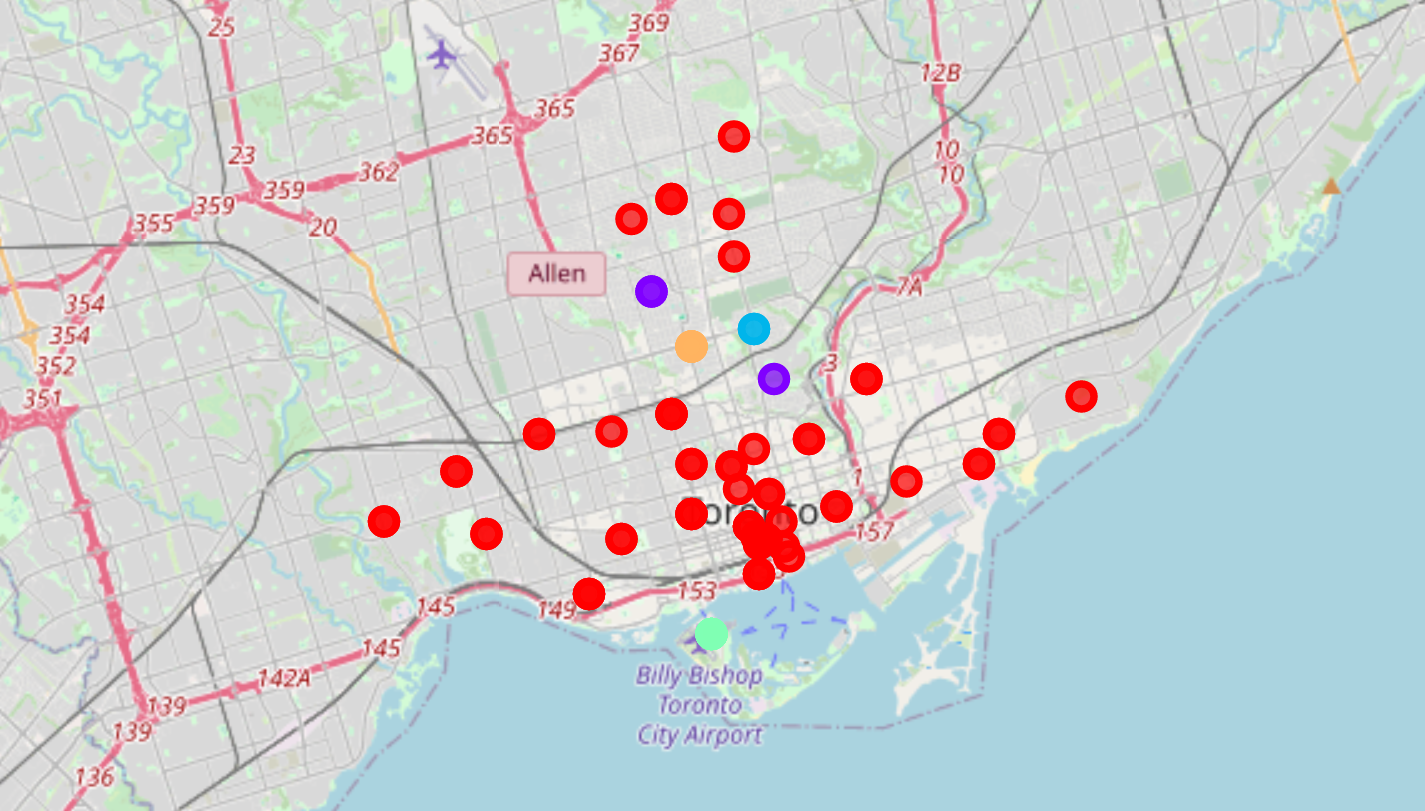